<a href="https://colab.research.google.com/github/norman02/Team-Awesome/blob/master/Team_Awesome_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

col_names=["id",
           "amt_given_credit",  # amount of given credit
           "gender",            # 1=male; 2=female
           "education",         # 1=grad school; 2=uni; 3=high school; 4=others
           "marital",           # 1=married; 2=single; 3=others
           "age",               # age

           # histories of past payments
           # -1=pay duly; 1=payment delay one month; 2=payment delay two months
           # ... 8=payment delay eight months; 9=payment delay nine months+
           "hist_sept", "hist_august", "hist_july",
           "hist_june", "hist_may", "hist_april",

           # amount of billing statements
           "billed_sept", "billed_august", "billed_july",
           "billed_june", "billed_may", "billed_april",

           # amount of previous payment
           "prev_sept", "prev_august", "prev_july",
           "prev_june", "prev_may", "prev_april",

           # default payment; 1=yes; 2=no
           "is_default"]
data = pd.read_csv('https://raw.githubusercontent.com/meauxt/credit-card-default/master/credit_cards_dataset.csv', header=0, names=col_names)

# the first column is the ID column, which we don't care about.
# the features are in columns 2 - 23
# the target variable is in the last column
X_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]

In [0]:
print("Number of rows :", data.shape[0])
print("Number of columns :", data.shape[1])

Number of rows : 30000
Number of columns : 25


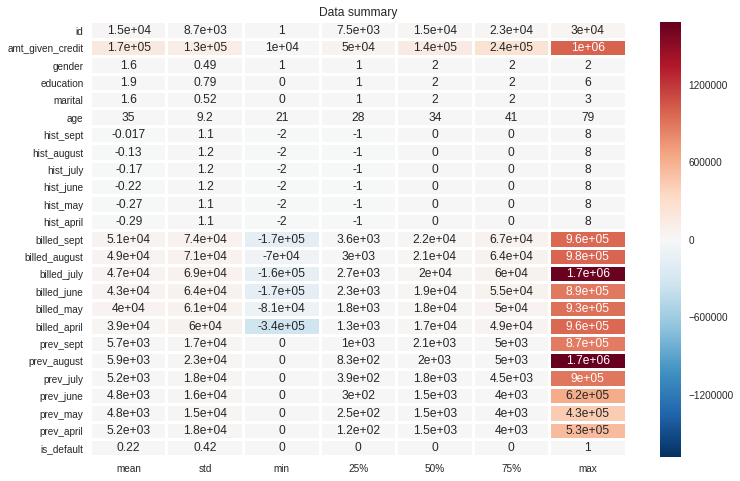

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# james: had issues getting the chart to generate with color, so I removed that part
sns.heatmap(data.describe()[1:].transpose(),
            annot=True, linecolor="w",
            linewidth=2,
            # cmap=sns.color_palette("Set2")
            )

plt.title("Data summary")
plt.show()

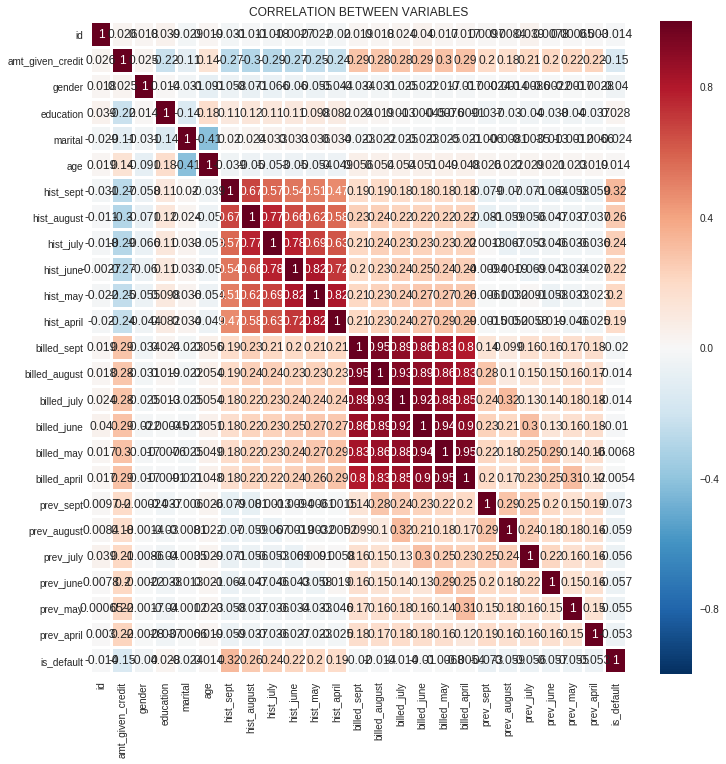

In [0]:
correlation = data.corr()
plt.figure(figsize=(12,12))
# james: had issues getting the chart to generate with color, so I removed that part
sns.heatmap(correlation, annot=True,
            # cmap=sns.color_palette("magma"),
            linewidth=2, edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X_data, y_data, test_size=0.2, random_state=1, stratify=y_data
)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report # Added this. Shows accuracy, recall and precision.

pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=100, criterion='gini'))

param_grid = [{'randomforestclassifier__n_estimators': [1, 10, 50, 70, 90, 100]}]
gs = GridSearchCV(estimator=pipeline,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10, n_jobs=2)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

# Just to show typical accuracy, recall and precision.
forest = pipeline.steps[1][1]
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.8155
{'randomforestclassifier__n_estimators': 90}
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.39      0.48      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [0]:
#Discriminative Features - Storm
#Might be worth looking at assuming I implimented it correctly. 
feature_labels = X_data.columns

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Discriminative features order:")
for f in range(23):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

Discriminative features order:
 1) hist_sept                      0.103563
 2) age                            0.066180
 3) billed_sept                    0.061620
 4) amt_given_credit               0.060560
 5) billed_august                  0.054414
 6) billed_july                    0.052089
 7) prev_sept                      0.051429
 8) billed_may                     0.050384
 9) billed_june                    0.050229
10) billed_april                   0.050135
11) prev_august                    0.047370
12) prev_april                     0.045899
13) prev_july                      0.045323
14) prev_june                      0.043726
15) prev_may                       0.043463
16) hist_august                    0.038932
17) hist_july                      0.030901
18) hist_june                      0.022353
19) education                      0.020217
20) hist_may                       0.019019
21) hist_april                     0.016156
22) marital                        0.013842
2

In [0]:
# Testing with smaller x_data. 

small_x = pd.DataFrame(X_data.hist_sept)
small_x['age'] = X_data.age

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(small_x, y_data, test_size=0.2, random_state=1, stratify=y_data)

pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=100, criterion='gini'))

gs = GridSearchCV(estimator=pipeline,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10, n_jobs=2)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

forest = pipeline.steps[1][1]
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.818625
{'randomforestclassifier__n_estimators': 90}
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.32      0.44      1327

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# some more basic feature selection
best_features = SelectKBest(score_func=f_classif, k=15)
feature_fit = best_features.fit(X_data, y_data)
feature_raw_scores = pd.DataFrame(feature_fit.scores_)
feature_cols = pd.DataFrame(X_data.columns)

feature_scores = pd.concat([feature_cols, feature_raw_scores], axis = 1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(15, 'Score'))

             Feature        Score
5          hist_sept  3537.714970
6        hist_august  2239.169136
7          hist_july  1757.466444
8          hist_june  1476.845967
9           hist_may  1304.591176
10        hist_april  1085.402485
0   amt_given_credit   724.068539
17         prev_sept   160.403810
18       prev_august   103.291524
20         prev_june    97.188000
19         prev_july    95.218011
21          prev_may    91.429801
22        prev_april    85.089045
1             gender    47.978854
2          education    23.547112
